In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
!dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 7496-5BB4

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\projects\LP_DS_project

27.10.2020  19:34    <DIR>          .
27.10.2020  19:34    <DIR>          ..
27.10.2020  19:34    <DIR>          .ipynb_checkpoints
27.10.2020  18:44           116я198 AFKS.csv
27.10.2020  06:33    <DIR>          env
27.10.2020  19:33            13я011 Filling data.ipynb
27.10.2020  18:44           116я505 GAZP.csv
27.10.2020  19:04           430я192 Gazprom.ipynb
27.10.2020  18:44           417я252 Grafic_akcii.ipynb
27.10.2020  19:15           394я043 Kamaz.ipynb
27.10.2020  18:44           108я755 KMAZ.csv
27.10.2020  18:44           183я007 qAFKS.csv
27.10.2020  18:44           190я932 qGAZP.csv
27.10.2020  19:10           180я626 qKMAZ.csv
27.10.2020  19:16           186я527 qSBER.csv
27.10.2020  19:30           192я537 qTATN.csv
27.10.2020  19:33            97я778 qYNDX.csv
27.10.2020  18:44           113я422 SBER.csv
27.10.2020  19:19           416я646 Sber.ipynb
27.

In [3]:
dataset = pd.read_csv('qYNDX.csv', sep=';')
dataset

,Unnamed: 0,Unnamed: 0.1,COMPANY,DATE,OPEN,CLOSE
0,0,119998,YNDX,2014-06-04,1546.7,1170.0
1,1,119999,YNDX,2014-06-05,1175.0,1145.1
2,2,120000,YNDX,2014-06-06,1158.3,1163.0
3,3,120000,YNDX,2014-06-07,1158.3,1163.0
4,4,120000,YNDX,2014-06-08,1158.3,1163.0
...,...,...,...,...,...,...
2306,2306,121603,YNDX,2020-09-26,4953.6,4934.0
2307,2307,121603,YNDX,2020-09-27,4953.6,4934.0
2308,2308,121604,YNDX,2020-09-28,4951.8,5074.0
2309,2309,121605,YNDX,2020-09-29,5074.8,5102.6


In [4]:
dataset['DATE']

0       2014-06-04
1       2014-06-05
2       2014-06-06
3       2014-06-07
4       2014-06-08
           ...    
2306    2020-09-26
2307    2020-09-27
2308    2020-09-28
2309    2020-09-29
2310    2020-09-30
Name: DATE, Length: 2311, dtype: object

In [5]:
dataset = pd.read_csv('qYNDX.csv', ';', index_col=['DATE'], parse_dates=['DATE'], dayfirst=True)

In [6]:
dataset2 = dataset
dataset2

,Unnamed: 0,Unnamed: 0.1,COMPANY,OPEN,CLOSE
DATE,,,,,
2014-06-04,0,119998,YNDX,1546.7,1170.0
2014-06-05,1,119999,YNDX,1175.0,1145.1
2014-06-06,2,120000,YNDX,1158.3,1163.0
2014-06-07,3,120000,YNDX,1158.3,1163.0
2014-06-08,4,120000,YNDX,1158.3,1163.0
...,...,...,...,...,...
2020-09-26,2306,121603,YNDX,4953.6,4934.0
2020-09-27,2307,121603,YNDX,4953.6,4934.0
2020-09-28,2308,121604,YNDX,4951.8,5074.0


In [7]:
#Оставлю эту ячейку здесь
#dataset2 = dataset2[(dataset2['DATE'] > '2014-01-01') & (dataset2['DATE'] < '2020-09-30')]
#dataset2

## Избавляемся от ненужных столбцов

In [8]:
dataset2 = dataset2.drop(['COMPANY'], axis=1)

In [9]:
dataset2 = dataset2.drop(['CLOSE'], axis=1)

In [10]:
dataset2 = dataset2.drop(['Unnamed: 0'], axis=1)

In [11]:
dataset2 = dataset2.drop(['Unnamed: 0.1'], axis=1)

In [12]:
dataset2

,OPEN
DATE,
2014-06-04,1546.7
2014-06-05,1175.0
2014-06-06,1158.3
2014-06-07,1158.3
2014-06-08,1158.3
...,...
2020-09-26,4953.6
2020-09-27,4953.6
2020-09-28,4951.8


# Строим график

In [13]:
dtst = dataset2

<AxesSubplot:xlabel='DATE'>

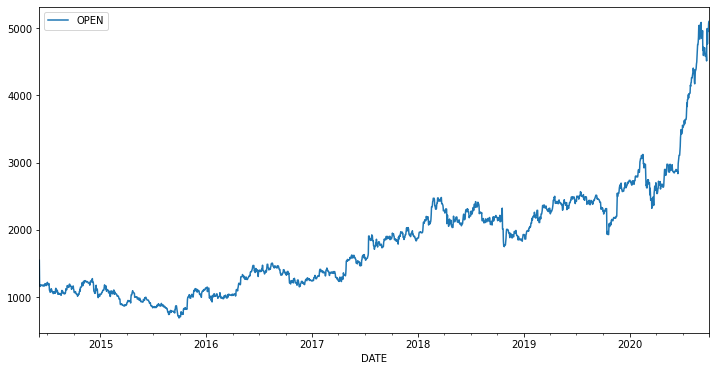

In [14]:
dtst.plot(figsize=(12,6))

### Данные с недельным интервалом

<AxesSubplot:xlabel='DATE'>

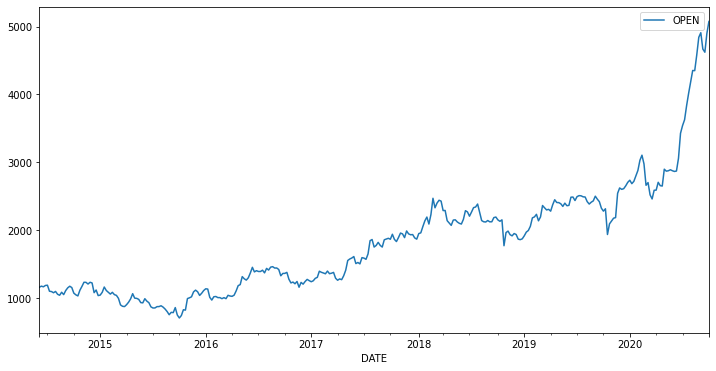

In [15]:
dtstw = dtst.resample('W').median()
dtstw.plot(figsize=(12,6))

In [16]:
dtstw

,OPEN
DATE,
2014-06-08,1158.3
2014-06-15,1175.0
2014-06-22,1165.2
2014-06-29,1185.0
2014-07-06,1188.9
...,...
2020-09-06,4909.0
2020-09-13,4668.2
2020-09-20,4621.8


In [17]:
dtstw.to_csv('week_qYNDX.csv', sep=';')

### Гистограмма с полными данными

,OPEN
count,2311.000000
mean,1811.658892
std,812.778899
min,688.000000
25%,1144.100000
50%,1770.500000
75%,2307.000000
max,5100.200000


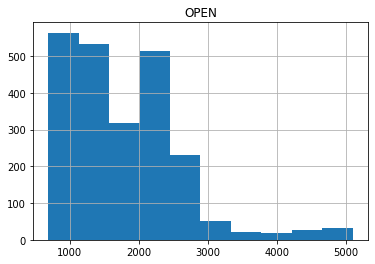

In [18]:
idtst = dtst.describe()
dtst.hist()
idtst

### Гистограмма с недельным интервалом

,OPEN
count,331.000000
mean,1817.175529
std,824.564403
min,706.000000
25%,1143.100000
50%,1770.500000
75%,2302.400000
max,5074.800000


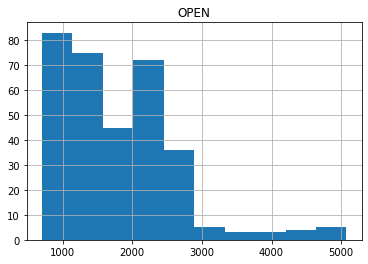

In [19]:
idtstw = dtstw.describe()
dtstw.hist()
idtstw

# Расчет коэффициента вариации

### Полные данные

In [20]:
V = idtst.loc['std']/idtst.loc['mean']

In [21]:
V

OPEN    0.448638
dtype: float64

### Недельные данные

In [22]:
Vw = idtstw.loc['std']/idtstw.loc['mean']

In [23]:
Vw

OPEN    0.453762
dtype: float64

# Тест Харки-Бера

### Полные данные

In [24]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(dtst, axis=1)
jb_test

(array([0.375, 0.375, 0.375, ..., 0.375, 0.375, 0.375]),
 array([0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [25]:
a = np.vstack([jb_test])
a

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
idtst = SimpleTable(a, row)
idtst

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Недельные данные


In [27]:
roww =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_testw = sm.stats.stattools.jarque_bera(dtstw, axis=1)
jb_testw

(array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
      

In [28]:
aw = np.vstack([jb_testw])
aw

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
idtstw = SimpleTable(aw, roww)
idtstw

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Тест Дикки-Фуллера

### Полные данные

In [30]:
dtst2 = dtst.dropna(how='any')

In [31]:
dtst2

,OPEN
DATE,
2014-06-04,1546.7
2014-06-05,1175.0
2014-06-06,1158.3
2014-06-07,1158.3
2014-06-08,1158.3
...,...
2020-09-26,4953.6
2020-09-27,4953.6
2020-09-28,4951.8


In [32]:
test = sm.tsa.adfuller(dtst2)

In [33]:
test_result = [{'adf: ': test[0], 'p-value: ': test[1], 'Critical values: ': test[4]}]
test_result = pd.DataFrame(test_result)
if test[0] > test[4]['5%']:
    test_result[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result[3] = 'единичных корней нет, ряд стационарен'

In [34]:
test_result

,adf:,p-value:,Critical values:,3
0,2.94379,1.0,"{'1%': -3.433202561761398, '5%': -2.8628001971...","есть единичные корни, ряд не стационарен"


### Недельные данные

In [35]:
dtst2w = dtstw.dropna(how='any')

In [36]:
dtst2w

,OPEN
DATE,
2014-06-08,1158.3
2014-06-15,1175.0
2014-06-22,1165.2
2014-06-29,1185.0
2014-07-06,1188.9
...,...
2020-09-06,4909.0
2020-09-13,4668.2
2020-09-20,4621.8


In [37]:
testw = sm.tsa.adfuller(dtst2w)

In [38]:
test_resultw = [{'adf: ': test[0], 'p-value: ': testw[1], 'Critical values: ': test[4]}]
test_resultw = pd.DataFrame(test_resultw)
if testw[0] > testw[4]['5%']:
    test_resultw[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_resultw[3] = 'единичных корней нет, ряд стационарен'

In [39]:
test_resultw

,adf:,p-value:,Critical values:,3
0,2.94379,1.0,"{'1%': -3.433202561761398, '5%': -2.8628001971...","есть единичные корни, ряд не стационарен"


### Проверка порядка интегрированного ряда

### Полные данные

In [40]:
dtst2diff = dtst.diff(periods=1).dropna()

In [41]:
test2 = sm.tsa.adfuller(dtst2diff)

In [42]:
test_result2 = [{'adf: ': test2[0], 'p-value: ': test2[1], 'Critical values: ': test2[4]}]
test_result2 = pd.DataFrame(test_result2)
if test2[0] > test2[4]['5%']:
    test_result2[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2[3] = 'единичных корней нет, ряд стационарен'

In [43]:
test_result2

,adf:,p-value:,Critical values:,3
0,-10.181802,6.664740e-18,"{'1%': -3.433208797064682, '5%': -2.8628029504...","единичных корней нет, ряд стационарен"


### Недельные данные

In [44]:
dtst2diffw = dtstw.diff(periods=1).dropna()

In [45]:
test2w = sm.tsa.adfuller(dtst2diffw)

In [46]:
test_result2w = [{'adf: ': test2w[0], 'p-value: ': test2w[1], 'Critical values: ': test2w[4]}]
test_result2w = pd.DataFrame(test_result2w)
if test2w[0] > test2w[4]['5%']:
    test_result2w[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2w[3] = 'единичных корней нет, ряд стационарен'

In [47]:
test_result2w

,adf:,p-value:,Critical values:,3
0,-7.178113,2.693852e-10,"{'1%': -3.4505694423906546, '5%': -2.870446946...","единичных корней нет, ряд стационарен"


### Проверка мат ожидания

In [48]:
#dt2diff.index[len(dt2diff.index)/3]

In [49]:
#m = dt2diff.index[len(dt2diff.index)/2+1]

In [50]:
"""r1 = sm.stats.DescrStatsW(dt2diff[m:])
r2 = sm.stats.DescrStatsW(dt2diff[:m])
prov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]
prov"""

'r1 = sm.stats.DescrStatsW(dt2diff[m:])\nr2 = sm.stats.DescrStatsW(dt2diff[:m])\nprov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]\nprov'

### Полные данные

<AxesSubplot:xlabel='DATE'>

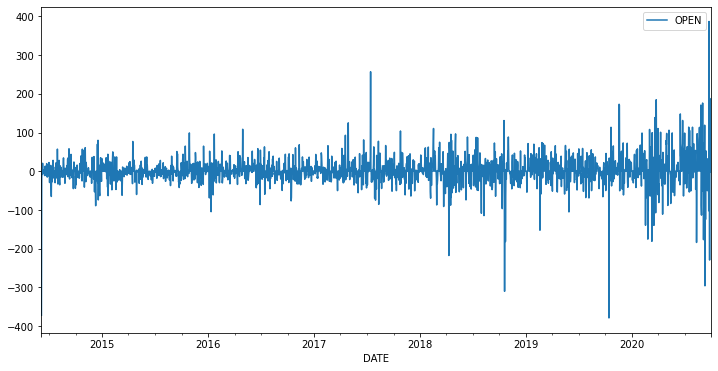

In [51]:
dtst2diff.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

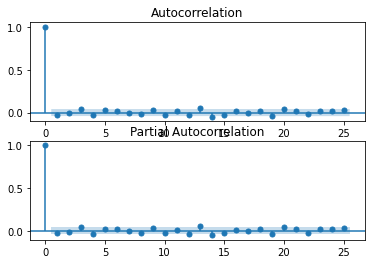

In [52]:
ig = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diff, lags=25, ax=ax2)

### Недельные данные

<AxesSubplot:xlabel='DATE'>

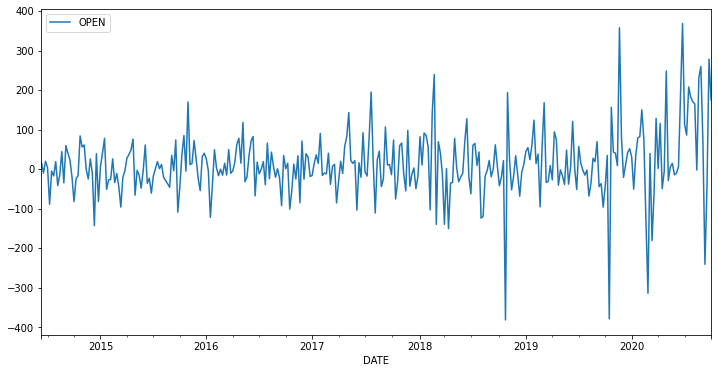

In [53]:
dtst2diffw.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

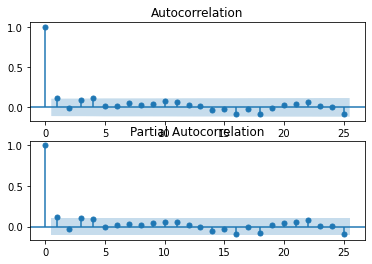

In [54]:
igw = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diffw.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diffw, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают

### Построение ARIMA модели

### Недельные данные

In [55]:
src_data_modelw = dtstw['2020-01-01':'2020-09-29']
modelw =  sm.tsa.arima.ARIMA(src_data_modelw, order=(1,1,1), freq='W').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

In [56]:
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -240.989
Date:                Tue, 27 Oct 2020   AIC                            487.979
Time:                        19:34:47   BIC                            492.891
Sample:                    01-05-2020   HQIC                           489.726
                         - 09-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2056      0.371     -0.554      0.580      -0.933       0.522
ma.L1          0.6839      0.286      2.389      0.017       0.123       1.245
sigma2      1.863e+04   5108.878      3.647      0.000    8619.580    2.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.66
Prob(Q):                              0.69   Prob(JB):                         0.26
Heteroskedasticity (H):               1.31   Skew:                            -0.64
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Полные данные (модель не строится)

In [57]:
src_data_model = dtst['2014-01-01':'2020-09-30']
model =  sm.tsa.arima.ARIMA(src_data_model, order=(1,1,1), freq='D').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                 2311
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11590.554
Date:                Tue, 27 Oct 2020   AIC                          23187.107
Time:                        19:34:47   BIC                          23204.342
Sample:                    06-04-2014   HQIC                         23193.389
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0433      0.427      0.101      0.919      -0.794       0.880
ma.L1         -0.0693      0.426     -0.163      0.871      -0.905       0.766
sigma2      1335.7467     11.397    117.201      0.000    1313.409    1358.085
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             56238.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.96   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q-тест Льюинга-Бокса

In [59]:
type(model.resid)

pandas.core.series.Series

In [60]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [61]:
q_test

(array([ 1.00000000e+00, -1.05795244e-01, -1.15876427e-02,  2.44690923e-02,
        -1.85677497e-02,  1.88578807e-02,  1.03999529e-02,  3.42030026e-04,
        -1.04860259e-02,  1.89224713e-02, -1.72403092e-02,  7.62763311e-03,
        -1.70432237e-02,  3.12935989e-02, -2.35947824e-02, -1.76448985e-02,
         8.73220789e-03, -5.08749640e-03,  1.17523752e-02, -1.40101665e-02,
         2.80211464e-02,  6.66370808e-03, -9.52847591e-03,  7.58987870e-03,
         1.19353710e-02,  1.53049243e-02,  9.07227212e-04, -1.27275779e-02,
         1.27192884e-02,  2.41058037e-02, -4.77619279e-03, -2.91636004e-03,
        -5.53414525e-03,  2.15455121e-02,  1.09895890e-02, -3.09794442e-02,
        -3.49804112e-03,  4.94581648e-03, -1.25383263e-02,  3.15800652e-03,
         1.17735437e-02]),
 array([25.89976873, 26.21061227, 27.59728984, 28.39610543, 29.22043721,
        29.47126023, 29.47153164, 29.72674505, 30.55817558, 31.24865233,
        31.3838681 , 32.0592355 , 34.33714558, 35.63267278, 36.3575

In [62]:
pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]})

,Q-stat,p-value
0,25.899769,3.596122e-07
1,26.210612,2.034407e-06
2,27.597290,4.412217e-06
3,28.396105,1.036697e-05
4,29.220437,2.098915e-05
5,29.471260,4.953200e-05
6,29.471532,1.186656e-04
7,29.726745,2.362199e-04
8,30.558176,3.523678e-04
9,31.248652,5.337324e-04


### Рассчет коэффициента детерминации

In [63]:
pred = model.predict('2020-09-30','2020-10-15', typ='levels')

In [64]:
trn = dtst['2020-09-15':]

In [65]:
trn.shape

(16, 1)

In [66]:
pred.shape

(16,)

In [67]:
pred

2020-09-30    5071.597234
2020-10-01    5099.316157
2020-10-02    5099.277894
2020-10-03    5099.276238
2020-10-04    5099.276166
2020-10-05    5099.276163
2020-10-06    5099.276163
2020-10-07    5099.276163
2020-10-08    5099.276163
2020-10-09    5099.276163
2020-10-10    5099.276163
2020-10-11    5099.276163
2020-10-12    5099.276163
2020-10-13    5099.276163
2020-10-14    5099.276163
2020-10-15    5099.276163
Freq: D, Name: predicted_mean, dtype: float64

In [68]:
pred = pred.to_frame()


In [69]:
pred.shape

(16, 1)

In [70]:
pred

,predicted_mean
2020-09-30,5071.597234
2020-10-01,5099.316157
2020-10-02,5099.277894
2020-10-03,5099.276238
2020-10-04,5099.276166
2020-10-05,5099.276163
2020-10-06,5099.276163
2020-10-07,5099.276163
2020-10-08,5099.276163
2020-10-09,5099.276163


In [71]:
pred.rename(columns={'predicted_mean': 'OPEN'}, inplace=True)

In [72]:
trn

,OPEN
DATE,
2020-09-15,4710.6
2020-09-16,4672.0
2020-09-17,4621.8
2020-09-18,4580.0
2020-09-19,4611.8
2020-09-20,4611.8
2020-09-21,4615.2
2020-09-22,4513.2
2020-09-23,4900.0


In [73]:
r2 = r2_score(trn, pred)

In [74]:
r2

-2.6348192602271268

In [75]:
metrics.rmse(trn,pred)

361.4394117603854

In [76]:
metrics.mae(trn,pred)

308.2143220255739

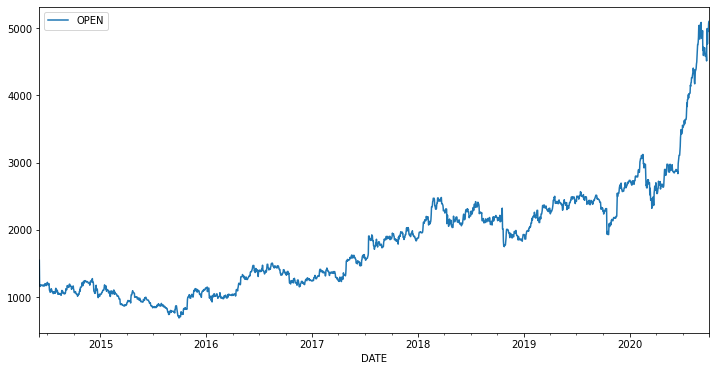

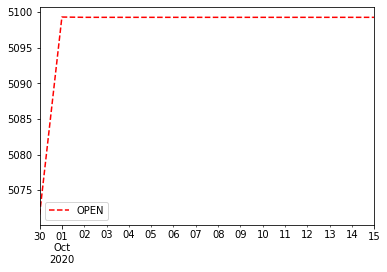

In [77]:
dtst.plot(figsize=(12,6))
pred.plot(style='r--')
plt.show()

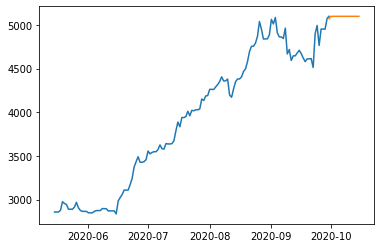

In [78]:
plt.plot(dtst['2020-05-15':])
plt.plot(pred)
plt.show()